In [ ]:
import pandas as pd
import numpy as np
import requests                    # for "get" request to API
import json                        # parse json into a list
import datetime as dt 
import time
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.express as px
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import os
import math
import seaborn as sns
import sklearn
from pylab import rcParams
from prettytable import PrettyTable
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.metrics import r2_score

In [ ]:

from pandas.core.frame import DataFrame
def get_binance_bars(coin, base_currency, interval, startTime, endTime):
    '''
    This function does not Return anything.
    Collects Coins Data from Server and store as individual .csv files.
    '''
    symbol = str(coin+base_currency)
    url = "https://api.binance.com/api/v3/klines"
 
    startTime = str(int(startTime.timestamp() * 1000))
    endTime = str(int(endTime.timestamp() * 1000))
    limit = '5000'
 
    req_params = {"symbol" : symbol, 'interval' : interval, 'startTime' : startTime, 'endTime' : endTime, 'limit' : limit}
 
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))
 
    if (len(df.index) == 0):
        print(f"Did not receieve OK response from Coinbase API for Coin {coin}")
        return None
     
    df = df.iloc[:, 0:6]
    df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']
 
    df.open      = df.open.astype("float")
    df.high      = df.high.astype("float")
    df.low       = df.low.astype("float")
    df.close     = df.close.astype("float")
    df.volume    = df.volume.astype("float")
    df['datetime'] = [dt.datetime.fromtimestamp(x/1000) for x in df.datetime]

    # df.set_index('datetime', inplace= True)
 
    

    #  for minute data
    # df.index = [pd.Timestamp(x/1000, unit='s', tz= 'Asia/Kolkata') for x in df.index]
    # df = df.astype('float')
    
    df.set_index('datetime', inplace = True )
    df.to_csv(f'{coin}.csv')



def get_data(filenames, col):
  '''
  col: Column name...can be Open, High, Close., etc 

  Merge files based on column 'col'.

  Returns a new merged dataframe.
  
  '''
  # Setting 'BTC' as default dataframe 
  df = pd.read_csv("{}.csv".format(filenames[0]), index_col= ['datetime'],usecols= [ 'datetime',col])

  # Change date_time dtype and set index, rename the columns as coin names
  # df = datetime_setter(df)
  df.rename(columns= {col: filenames[0]}, inplace= True)
  # Join the data wrt column provided
  for name in filenames[1:]:
    df_temp = pd.read_csv("{}.csv".format(name), index_col= ['datetime'],usecols= [ 'datetime',col] )
     

    # Change date_time dtype and set index, rename the columns as coin names
    # df_temp = datetime_setter(df_temp)
    df_temp = df_temp[col].rename(name)

    # Perform join
    df = df.join(df_temp, how= 'inner')

  return df

In [ ]:
# end_date =  dt.datetime.today()
# start_date = end_date - dt.timedelta(days= 2)
start_date = dt.datetime(2020, 2, 5)
end_date = dt.datetime(2022,1, 31)
interval = '1d'

base_currency = 'USDT'
#  change coins name from here..............no 1
coins = ['BTC'] 

for coin in coins:
  get_binance_bars(coin, base_currency, interval, start_date, end_date)

In [ ]:
df = pd.read_csv('BTC.csv')
# df= df.rename(columns = {'Unnamed: 0': 'datetime'})
df.set_index('datetime',inplace=True)
df

,open,high,low,close,volume
datetime,,,,,
2020-02-05,9197.02,9744.45,9177.22,9612.04,64870.415615
2020-02-06,9612.03,9862.57,9526.35,9772.00,64949.706588
2020-02-07,9772.00,9885.00,9730.00,9813.73,43966.114632
2020-02-08,9813.87,9940.00,9667.11,9895.05,43600.843666
2020-02-09,9895.04,10166.00,9880.75,10151.75,43408.475616
...,...,...,...,...,...
2022-01-27,36807.24,37234.47,35507.01,37160.10,53020.879340
2022-01-28,37160.11,38000.00,36155.01,37716.56,42154.269560
2022-01-29,37716.57,38720.74,37268.44,38166.84,26129.496820


In [ ]:
df.head()

,open,high,low,close,volume
datetime,,,,,
2020-02-05,9197.02,9744.45,9177.22,9612.04,64870.415615
2020-02-06,9612.03,9862.57,9526.35,9772.00,64949.706588
2020-02-07,9772.00,9885.00,9730.00,9813.73,43966.114632
2020-02-08,9813.87,9940.00,9667.11,9895.05,43600.843666
2020-02-09,9895.04,10166.00,9880.75,10151.75,43408.475616


In [ ]:
df.tail()

,open,high,low,close,volume
datetime,,,,,
2022-01-27,36807.24,37234.47,35507.01,37160.10,53020.87934
2022-01-28,37160.11,38000.00,36155.01,37716.56,42154.26956
2022-01-29,37716.57,38720.74,37268.44,38166.84,26129.49682
2022-01-30,38166.83,38359.26,37351.63,37881.76,21430.66527
2022-01-31,37881.75,38744.00,36632.61,38466.90,36855.24580


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 2020-02-05 to 2022-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    727 non-null    float64
 1   high    727 non-null    float64
 2   low     727 non-null    float64
 3   close   727 non-null    float64
 4   volume  727 non-null    float64
dtypes: float64(5)
memory usage: 34.1+ KB


In [ ]:
df.describe()

,open,high,low,close,volume
count,727.000000,727.000000,727.000000,727.000000,727.000000
mean,30694.323246,31590.764388,29667.263975,30734.785282,69684.052961
std,19305.709266,19844.504666,18657.822733,19291.460777,39417.414383
min,4800.010000,5365.420000,3782.130000,4800.000000,18340.460400
25%,10358.905000,10569.195000,10163.875000,10380.665000,44483.524968
50%,33502.870000,34717.270000,31962.990000,33526.370000,59818.852697
75%,47855.545000,49281.650000,46626.495000,47855.550000,83424.069071
max,67525.820000,69000.000000,66222.400000,67525.830000,402201.673764


In [ ]:
df.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [ ]:
# converting Date to datetime format for easy processing
month = {'jan':'01',
         'Feb':'02',
         'Mar':'03',
         'Apr':'04',
         'may':'05',
         'jun':'06',
         'jul':'07',
         'aug':'08',
         'sep':'09',
         'oct':'10',
         'nov':'11',
         'dec':'12'}
def date_format(x):
  arr = x.split()
  arr[0] = month[arr[0]]
  arr[1] = arr[1][0:-1]
  return str(arr[0]+'-'+arr[1]+'-'+arr[2])

In [ ]:
# df['datetime'] = df['datetime'].apply(date_format)

In [ ]:
df.head()

,open,high,low,close,volume
datetime,,,,,
2020-02-05,9197.02,9744.45,9177.22,9612.04,64870.415615
2020-02-06,9612.03,9862.57,9526.35,9772.00,64949.706588
2020-02-07,9772.00,9885.00,9730.00,9813.73,43966.114632
2020-02-08,9813.87,9940.00,9667.11,9895.05,43600.843666
2020-02-09,9895.04,10166.00,9880.75,10151.75,43408.475616


In [ ]:
# df['datetime'] = pd.to_datetime(df['datetime'],format='%m-%d-%Y')

In [ ]:
# printing the start date and end date of the dataset
ed = df.iloc[0][0]
sd = df.iloc[-1][0]

print("Starting Date",sd)
print("Ending Date",ed)

Starting Date 37881.75
Ending Date 9197.02


plotting only closing price

In [ ]:
closedf= pd.DataFrame()
closedf['close'] = df['close']
closedf

,close
datetime,
2020-02-05,9612.04
2020-02-06,9772.00
2020-02-07,9813.73
2020-02-08,9895.05
2020-02-09,10151.75
...,...
2022-01-27,37160.10
2022-01-28,37716.56
2022-01-29,38166.84


In [ ]:
fig = px.line(closedf)
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2020-2022', plot_bgcolor='red', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

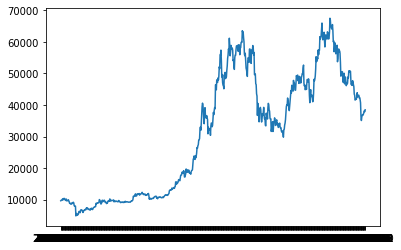

In [ ]:
plt.plot(closedf.close)

plotting percent change wrt previous month

In [ ]:
# plt.figure(figsize=(20,8))
# plt.plot(closedf.datetime,closedf.close.close.pct_change().mul(100))
def compute_daily_returns(closedf):
  daily_returns = closedf['close']/closedf['close'].shift(1)-1
  daily_returns*100
  daily_returns.iloc[0:1] = 0

  closedf = pd.DataFrame()
  closedf['daily_returns'] = daily_returns

  return closedf

ret1 = compute_daily_returns(closedf)
ret1

,daily_returns
datetime,
2020-02-05,0.000000
2020-02-06,0.016642
2020-02-07,0.004270
2020-02-08,0.008286
2020-02-09,0.025942
...,...
2022-01-27,0.009529
2022-01-28,0.014975
2022-01-29,0.011939


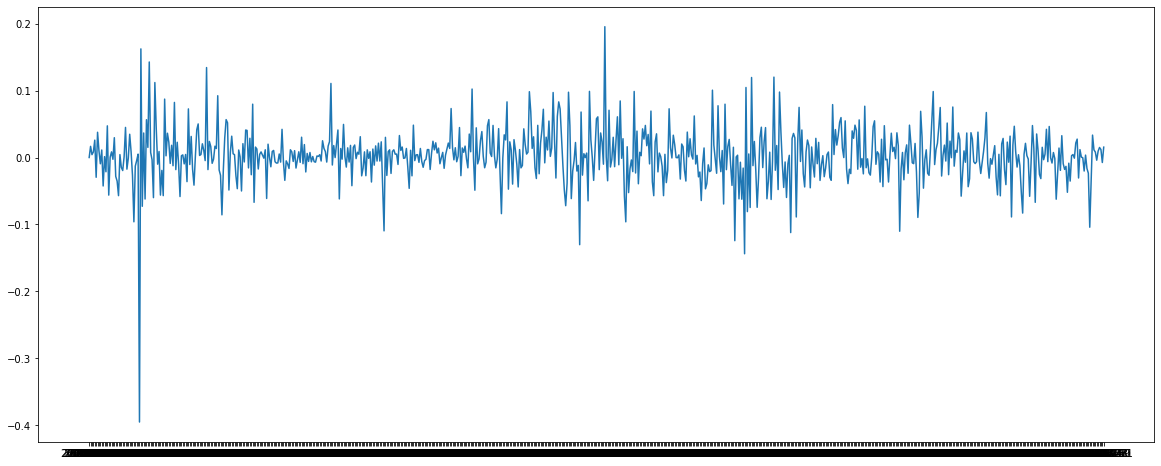

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(ret1['daily_returns'])
plt.show()

Trying Rolling function

In [ ]:
# closedf['datetime'] = pd.to_datetime(closedf['datetime'])

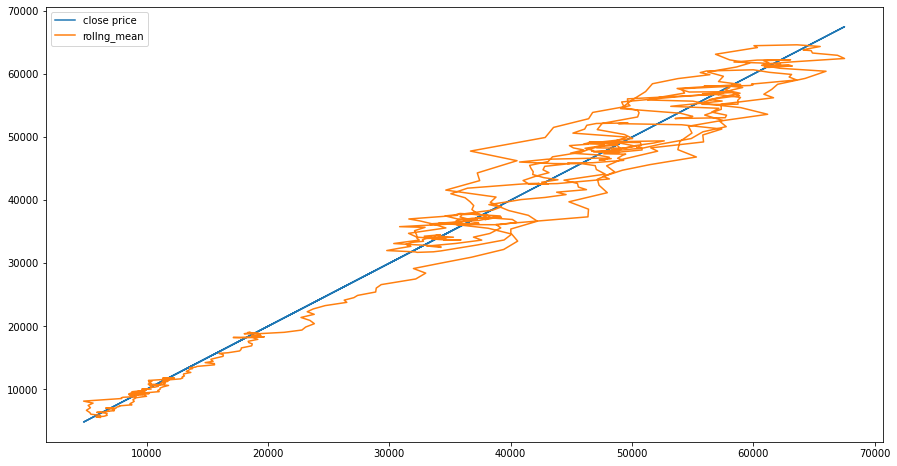

In [ ]:
plt.figure(figsize=(15,8))
rolling_close = closedf.close.rolling(10).mean()
plt.plot(closedf,closedf.close)
plt.plot(closedf,rolling_close)
plt.legend(['close price ','rollng_mean'])
plt.show()

In [ ]:
closedf2 = closedf.iloc[::-1].reset_index()

checking Trends, seasonality and noise

In [ ]:
# rcParams['figure.figsize'] = 11,9
# decomposed_google_volume = sm.tsa.seasonal_decompose(closedf2['close'],freq=360)
# figure = decomposed_google_volume.plot()
# plt.show()

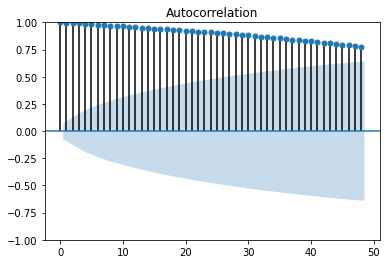

In [ ]:
# A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function,
plot_acf(closedf2['close'].values,lags=48)
plt.show()

In [ ]:
# plot_acf(decomposed_google_volume.seasonal)
# plt.show()

Trying basic prediction models

In [ ]:
regressor_df = closedf2.copy(deep=True)

In [ ]:
regressor_df['close_price_LastMonth'] = regressor_df['close'].shift(+30)
regressor_df['close_price_2Monthsback'] = regressor_df['close'].shift(+60)
regressor_df['close_price_3Monthsback'] = regressor_df['close'].shift(+90)
regressor_df

,datetime,close,close_price_LastMonth,close_price_2Monthsback,close_price_3Monthsback
0,2022-01-31,38466.90,NaN,NaN,NaN
1,2022-01-30,37881.76,NaN,NaN,NaN
2,2022-01-29,38166.84,NaN,NaN,NaN
3,2022-01-28,37716.56,NaN,NaN,NaN
4,2022-01-27,37160.10,NaN,NaN,NaN
...,...,...,...,...,...
722,2020-02-09,10151.75,7894.56,7283.54,9539.40
723,2020-02-08,9895.05,7929.87,7361.28,9800.01
724,2020-02-07,9813.73,8033.31,7197.32,9986.40
725,2020-02-06,9772.00,8886.66,7329.90,9142.92


In [ ]:
regressor_df = regressor_df.dropna()
regressor_df

,datetime,close,close_price_LastMonth,close_price_2Monthsback,close_price_3Monthsback
90,2021-11-02,63219.99,56480.34,47722.65,38466.90
91,2021-11-01,60911.11,57184.07,46216.93,37881.76
92,2021-10-31,61299.80,56950.56,47120.87,38166.84
93,2021-10-30,61859.19,57776.25,46464.66,37716.56
94,2021-10-29,62253.71,57274.88,47543.74,37160.10
...,...,...,...,...,...
722,2020-02-09,10151.75,7894.56,7283.54,9539.40
723,2020-02-08,9895.05,7929.87,7361.28,9800.01
724,2020-02-07,9813.73,8033.31,7197.32,9986.40
725,2020-02-06,9772.00,8886.66,7329.90,9142.92


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=1)

In [ ]:
import numpy as np
x1,x2,x3,y = regressor_df['close_price_LastMonth'],regressor_df['close_price_2Monthsback'],regressor_df['close_price_3Monthsback'],regressor_df['close']
x1,x2,x3,y = np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[56480.34 47722.65 38466.9 ]
 [57184.07 46216.93 37881.76]
 [56950.56 47120.87 38166.84]
 ...
 [ 8033.31  7197.32  9986.4 ]
 [ 8886.66  7329.9   9142.92]
 [ 9131.88  6772.78  9021.83]]


In [ ]:
x_train,x_test,y_train,y_test = final_x[:-100],final_x[-100:],y[:-100],y[-100:]

In [ ]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

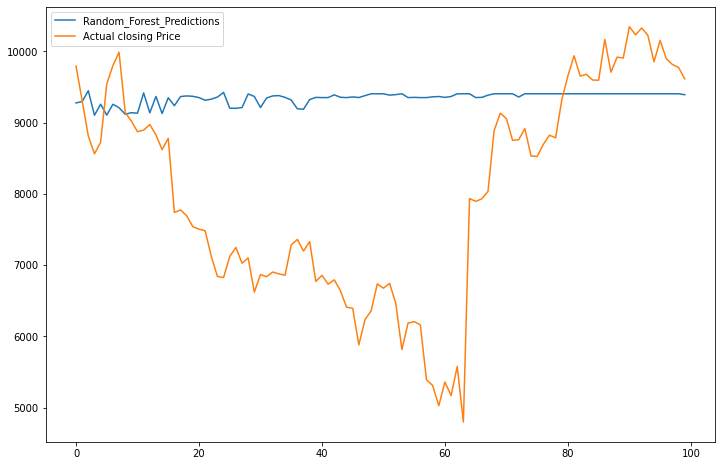

In [ ]:
pred = model.predict(x_test)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(pred,label = 'Random_Forest_Predictions')
plt.plot(y_test,label='Actual closing Price')
plt.legend(loc='upper left')
plt.show()

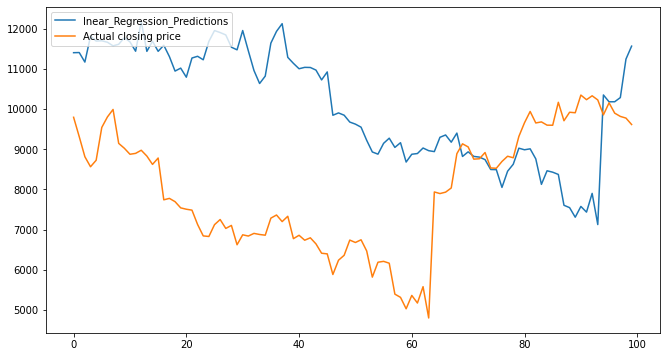

In [ ]:
lin_pred = lin_model.predict(x_test)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11,6)
plt.plot(lin_pred,label='lnear_Regression_Predictions')
plt.plot(y_test,label='Actual closing price')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf = sqrt(mean_squared_error(pred,y_test))
rmse_lr = sqrt(mean_squared_error(lin_pred,y_test))

In [ ]:
print("Mean Squared Error for Random Forest Model is:",rmse_rf)
print("Mean Squared Error for Linear Regression Model is:",rmse_lr)

Mean Squared Error for Random Forest Model is: 2012.003160485134
Mean Squared Error for Linear Regression Model is: 3052.2130180990553


Trying Linear regression extensively

In [ ]:
# regressor_df=regressor_df.dropna(['close_price_LastMonth','close_price_2Monthsback'],axis='columns')
# regressor_df

In [ ]:
regressor_df.head()

,datetime,close,close_price_LastMonth,close_price_2Monthsback,close_price_3Monthsback
90,2021-11-02,63219.99,56480.34,47722.65,38466.90
91,2021-11-01,60911.11,57184.07,46216.93,37881.76
92,2021-10-31,61299.80,56950.56,47120.87,38166.84
93,2021-10-30,61859.19,57776.25,46464.66,37716.56
94,2021-10-29,62253.71,57274.88,47543.74,37160.10


In [ ]:
for i in range(1,31):
  temp_str = 'close_'+str(i)
  regressor_df[temp_str] = regressor_df['close'].shift(+i)
regressor_df

,datetime,close,close_price_LastMonth,close_price_2Monthsback,close_price_3Monthsback,close_1,close_2,close_3,close_4,close_5,...,close_21,close_22,close_23,close_24,close_25,close_26,close_27,close_28,close_29,close_30
90,2021-11-02,63219.99,56480.34,47722.65,38466.90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,2021-11-01,60911.11,57184.07,46216.93,37881.76,63219.99,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,2021-10-31,61299.80,56950.56,47120.87,38166.84,60911.11,63219.99,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2021-10-30,61859.19,57776.25,46464.66,37716.56,61299.80,60911.11,63219.99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2021-10-29,62253.71,57274.88,47543.74,37160.10,61859.19,61299.80,60911.11,63219.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2020-02-09,10151.75,7894.56,7283.54,9539.40,9851.83,10223.08,10326.46,10229.63,10344.36,...,8531.88,8915.24,8760.07,8750.87,9054.68,9131.88,8886.66,8033.31,7929.87,7894.56
723,2020-02-08,9895.05,7929.87,7361.28,9800.01,10151.75,9851.83,10223.08,10326.46,10229.63,...,8523.61,8531.88,8915.24,8760.07,8750.87,9054.68,9131.88,8886.66,8033.31,7929.87
724,2020-02-07,9813.73,8033.31,7197.32,9986.40,9895.05,10151.75,9851.83,10223.08,10326.46,...,8692.91,8523.61,8531.88,8915.24,8760.07,8750.87,9054.68,9131.88,8886.66,8033.31
725,2020-02-06,9772.00,8886.66,7329.90,9142.92,9813.73,9895.05,10151.75,9851.83,10223.08,...,8823.21,8692.91,8523.61,8531.88,8915.24,8760.07,8750.87,9054.68,9131.88,8886.66


In [ ]:
regressor_df = regressor_df.dropna()
regressor_df

,datetime,close,close_price_LastMonth,close_price_2Monthsback,close_price_3Monthsback,close_1,close_2,close_3,close_4,close_5,...,close_21,close_22,close_23,close_24,close_25,close_26,close_27,close_28,close_29,close_30
120,2021-10-03,48200.01,63219.99,56480.34,47722.65,49224.94,51471.99,55315.00,53785.22,53951.43,...,60852.22,63078.78,60328.81,58413.44,60575.89,62253.71,61859.19,61299.80,60911.11,63219.99
121,2021-10-02,47634.90,60911.11,57184.07,46216.93,48200.01,49224.94,51471.99,55315.00,53785.22,...,61286.75,60852.22,63078.78,60328.81,58413.44,60575.89,62253.71,61859.19,61299.80,60911.11
122,2021-10-01,48141.61,61299.80,56950.56,47120.87,47634.90,48200.01,49224.94,51471.99,55315.00,...,60688.22,61286.75,60852.22,63078.78,60328.81,58413.44,60575.89,62253.71,61859.19,61299.80
123,2021-09-30,43824.10,61859.19,57776.25,46464.66,48141.61,47634.90,48200.01,49224.94,51471.99,...,62193.15,60688.22,61286.75,60852.22,63078.78,60328.81,58413.44,60575.89,62253.71,61859.19
124,2021-09-29,41524.28,62253.71,57274.88,47543.74,43824.10,48141.61,47634.90,48200.01,49224.94,...,66001.41,62193.15,60688.22,61286.75,60852.22,63078.78,60328.81,58413.44,60575.89,62253.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2020-02-09,10151.75,7894.56,7283.54,9539.40,9851.83,10223.08,10326.46,10229.63,10344.36,...,8531.88,8915.24,8760.07,8750.87,9054.68,9131.88,8886.66,8033.31,7929.87,7894.56
723,2020-02-08,9895.05,7929.87,7361.28,9800.01,10151.75,9851.83,10223.08,10326.46,10229.63,...,8523.61,8531.88,8915.24,8760.07,8750.87,9054.68,9131.88,8886.66,8033.31,7929.87
724,2020-02-07,9813.73,8033.31,7197.32,9986.40,9895.05,10151.75,9851.83,10223.08,10326.46,...,8692.91,8523.61,8531.88,8915.24,8760.07,8750.87,9054.68,9131.88,8886.66,8033.31
725,2020-02-06,9772.00,8886.66,7329.90,9142.92,9813.73,9895.05,10151.75,9851.83,10223.08,...,8823.21,8692.91,8523.61,8531.88,8915.24,8760.07,8750.87,9054.68,9131.88,8886.66


In [ ]:
import numpy as np
y = regressor_df['close']
y = np.array(y)
x_temp = regressor_df.iloc[:,2:32]
x_temp = np.array(x_temp)
print(x_temp.shape)

(607, 30)


In [ ]:
print(x_temp)

[[63219.99 56480.34 47722.65 ... 60575.89 62253.71 61859.19]
 [60911.11 57184.07 46216.93 ... 58413.44 60575.89 62253.71]
 [61299.8  56950.56 47120.87 ... 60328.81 58413.44 60575.89]
 ...
 [ 8033.31  7197.32  9986.4  ...  8760.07  8750.87  9054.68]
 [ 8886.66  7329.9   9142.92 ...  8915.24  8760.07  8750.87]
 [ 9131.88  6772.78  9021.83 ...  8531.88  8915.24  8760.07]]


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model_30=LinearRegression()

In [ ]:
x_train,x_test,y_train,y_test = x_temp[:-100],x_temp[-100:],y[:-100],y[-100:]

In [ ]:
lin_model_30.fit(x_train,y_train)

LinearRegression()

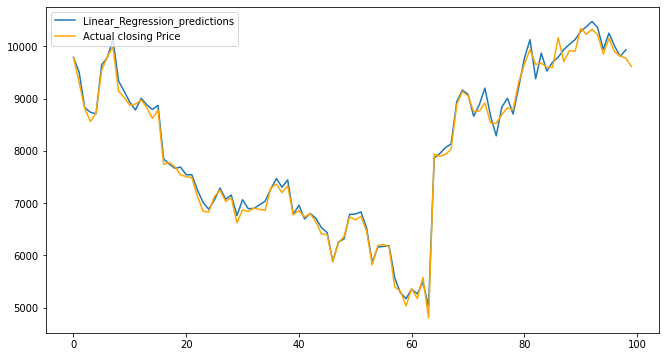

In [ ]:
# predictions on test data
lin_pred_30 = lin_model_30.predict(x_test)
plt.rcParams['figure.figsize'] = (11,6)
plt.plot(lin_pred_30[1:],label='Linear_Regression_predictions')
plt.plot(y_test,label='Actual closing Price',color='orange')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print('R2-SCORE:,')
print(r2_score(lin_pred_30[1:],y_test[:-1]))
print('MSE:')
print(mean_squared_error(lin_pred_30[1:],y_test[:-1]))

R2-SCORE:,
0.9934101157090655
MSE:
14731.285872167224


Doing future forecasting

In [ ]:
x_final_pred = []
x_temp2=[]
x1=x_temp[-1]
x_final_pred = x1
x_final_pred = list(x_final_pred)
DAY = 30
def forecast(days=30):
  day = 1
  while (day<days):
    x_temp2 = x_final_pred[-30:]
    #print(x_temp2)
    x_temp2 = np.array(x_temp2)
    x_temp2 = x_temp2[::-1]
    x_temp2 = x_temp2.reshape(1,-1)
    pred = lin_model_30.predict(x_temp2)
    x_final_pred.append(pred[0])
    day = day+1
  return x_final_pred
x_forecast = forecast(days=20)

In [ ]:
x1_true = list(regressor_df['close'])
x1_forecast = list(x1_true.copy())

In [ ]:
for i in range(30,len(x_forecast)):
  x1_forecast.append(x_forecast[i])

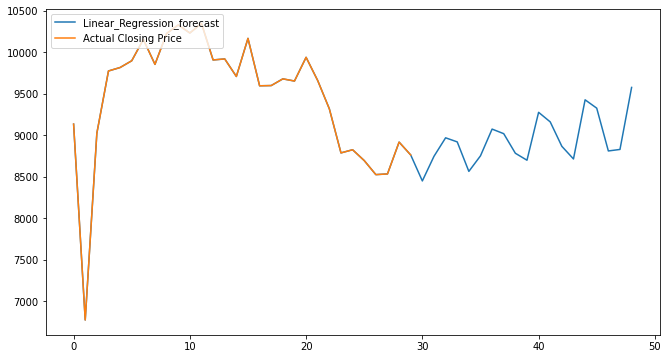

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(x_forecast,label='Linear_Regression_forecast')
plt.plot(x1,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.show()

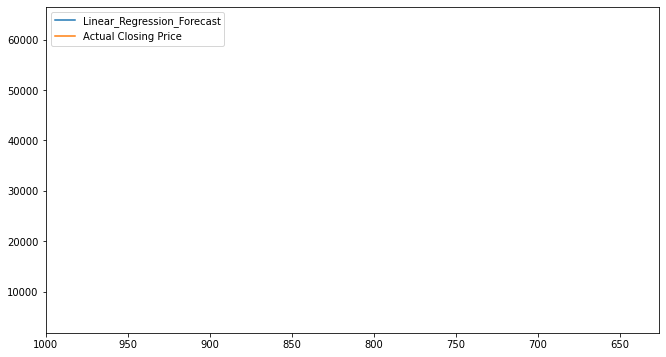

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(x1_forecast,label='Linear_Regression_Forecast')
plt.plot(x1_true,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.xlim(1000, len(x1_forecast) )
plt.show()

cheking difference between forecasting data and test data

In [ ]:
x_final_pred = []
x_temp2=[]
x1 = x_train[-1]
x_final_pred = x1
x_final_pred = list(x_final_pred)
DAY=30
def forecast(days=30):
  day=1
  while(day<days):
    x_temp2 = x_final_pred[-30:]
    x_temp2 = np.array(x_temp2)
    x_temp2 = x_temp2[::-1]
    x_temp2 = x_temp2.reshape(1,-1)
    pred = lin_model_30.predict(x_temp2)
    x_final_pred.append(pred[0])
    day = day+1
  return x_final_pred
x_forecast_new = forecast(days=15)
x_forecast2 = x_forecast_new[30:]

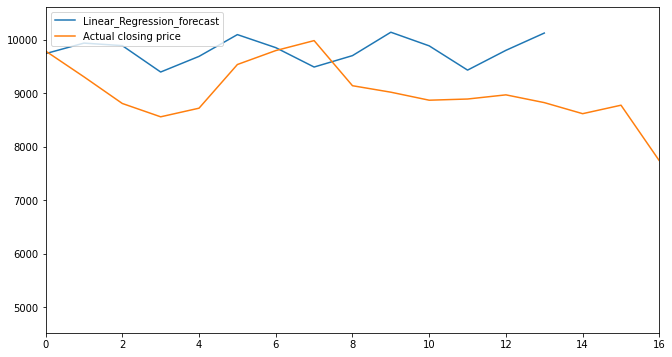

In [ ]:
plt.rcParams['figure.figsize'] = (11,6)
plt.plot(x_forecast2,label='Linear_Regression_forecast')
plt.plot(y_test,label='Actual closing price')
plt.legend(loc='upper left')
plt.xlim(0,16)
plt.show()

In [ ]:
print('R2-SCORE: ')
print(r2_score(x_forecast2, y_test[0:14]))
print('MSE')
print(mean_squared_error(x_forecast2,y_test[0:14]))

R2-SCORE: 
-10.824411950126043
MSE
646654.1115998375


Trying other supervised learning models

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
model_xgb = xgb.XGBRegressor()
model_xgb.fit(x_train, y_train,verbose=True)

[09:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

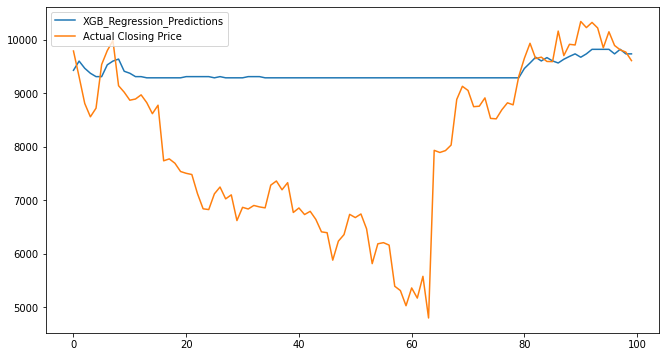

In [ ]:
xgb_pred_30=model_xgb.predict(x_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(xgb_pred_30,label='XGB_Regression_Predictions')
plt.plot(y_test,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.show()

WhatsApp Imge 2022-5-1 at 8.12.10 PM.jpg


In [ ]:
print('R2-SCORE: ')
print(r2_score(xgb_pred_30[1:],y_test[:-1]))
print('MSE:')
print(mean_squared_error(xgb_pred_30[1:],y_test[:-1]))

R2-SCORE: 
-129.66741786631692
MSE:
3868958.589939788


LightGBM Model

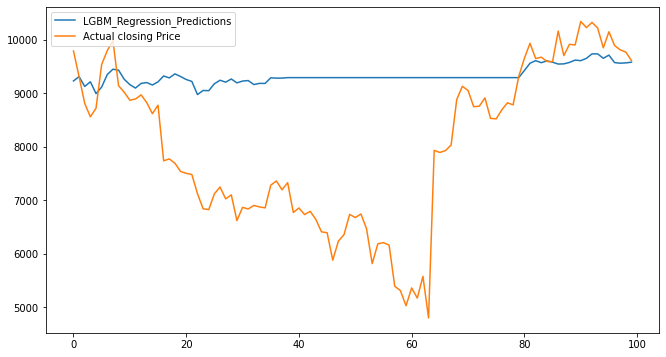

In [ ]:
import lightgbm as ltb
model = ltb.LGBMRegressor()
model.fit(x_train,y_train)
predicted_y_lgm = model.predict(x_test)
plt.rcParams['figure.figsize'] = (11,6)
plt.plot(predicted_y_lgm,label='LGBM_Regression_Predictions')
plt.plot(y_test,label='Actual closing Price')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# WhatsApp Image 2022-05-01 at 8.18.12 PM.jpeg

In [ ]:
# print('R2-SCORE')
# print(r2_score(predicted_y_lgbm[1:],y_test[:-1]))
# print('MSE')
# print(mean_squared_error(predicted_y_lgbm[1:],y_test[:-1]))

Trying Ridge Regression as variable are highly correlated

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
#define model
model_ridge=RidgeCV(alphas=np.arange(0,1,0.01),cv=cv,scoring='neg_mean_absolute_error')
#fit model
model_ridge.fit(x_train,y_train)
#summarize chosen configuration
print('alpha: %f' %model_ridge.alpha_)

alpha: 0.990000


In [ ]:
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
model_ridge = RidgeCV(alphas=np.arange(0.8, 1, 0.01),cv=cv,scoring='neg_mean_absolute_error')
model_ridge.fit(x_train,y_train)

RidgeCV(alphas=array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

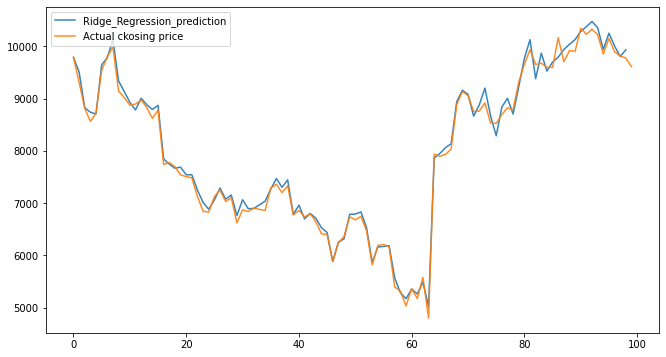

In [ ]:
ridge_pred_30 = model_ridge.predict(x_test)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11,6)
plt.plot(ridge_pred_30[1:],label='Ridge_Regression_prediction',alpha=0.9)
plt.plot(y_test,label='Actual ckosing price',alpha=0.9)
plt.legend(loc='upper left')
plt.show()

In [ ]:
print("R2-SCORE: ")
print(r2_score(ridge_pred_30[1:],y_test[:-1]))
print("MSE")
print(mean_squared_error(ridge_pred_30[1:],y_test[:-1]))

R2-SCORE: 
0.9934101157159897
MSE
14731.285855244894


In [ ]:
from sklearn.linear_model import LassoCV
#Lasso with 5 fold cross-validation
model = LassoCV(cv=5,random_state=0,max_iter=10000)
#fit model
model.fit(x_train,y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [ ]:
from sklearn.linear_model import Lasso
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(x_train,y_train)

Lasso(alpha=458436.1200277242)

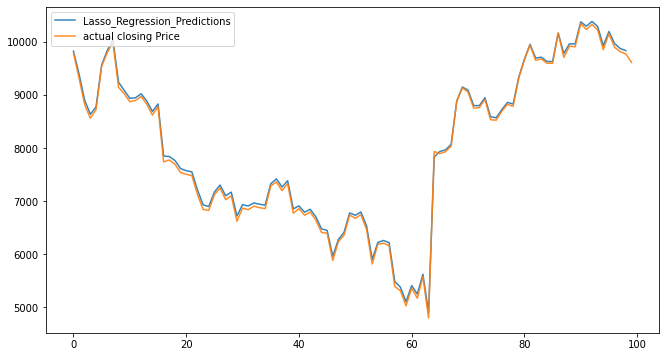

In [ ]:
lasso_pred_30 = lasso_best.predict(x_test)
plt.rcParams['figure.figsize'] = (11,6)
plt.plot(lasso_pred_30[1:],label='Lasso_Regression_Predictions',alpha=0.9)
plt.plot(y_test,label='actual closing Price',alpha=0.9)
plt.legend(loc='upper left')
plt.show()

In [ ]:
print("R2-SCORE")
print(r2_score(lasso_pred_30[1:],y_test[:-1]))
print("MSE: ")
print(mean_squared_error(lasso_pred_30[1:],y_test[:-1]))

R2-SCORE
0.9983567386728323
MSE: 
3597.248328157052


Elastic Net Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model_elastic, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -1006.240
Config: {'alpha': 100.0, 'l1_ratio': 0.99}


In [ ]:
from sklearn.linear_model import ElasticNet
model_elastic = ElasticNet(alpha=100,l1_ratio=0.99)
model_elastic.fit(x_train,y_train)

ElasticNet(alpha=100, l1_ratio=0.99)

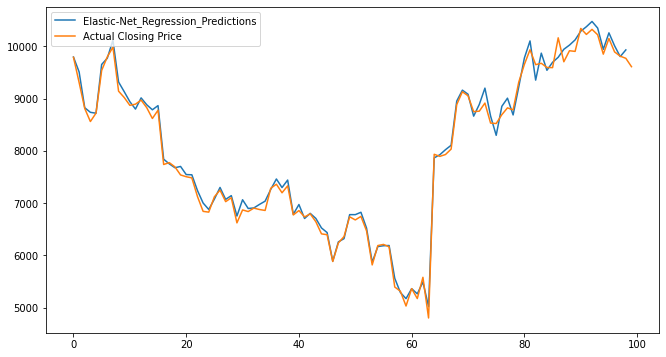

In [ ]:
Elastic_pred_30=model_elastic.predict(x_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(Elastic_pred_30[1:],label='Elastic-Net_Regression_Predictions')
plt.plot(y_test,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.show()

In [ ]:
print('R2-SCORE')
print(r2_score(Elastic_pred_30[1:],y_test[:-1]))
print('MSE:')
print(mean_squared_error(Elastic_pred_30[1:],y_test[:-1]))

R2-SCORE
0.9934823417416396
MSE:
14559.349532150056


In [ ]:
x_final_pred = []
x_temp2 = []
x1 = x_train[-1]
x_final_pred = x1
x_final_pred = list(x_final_pred)
DAY = 30
def forecast(days=30):
  day = 1
  while (day<days):
    x_temp2 = x_final_pred[-30:]
    x_temp2 = np.array(x_temp2)
    x_temp2 = x_temp2[::-1]
    x_temp2 = x_temp2.reshape(1,-1)
    pred = model_elastic.predict(x_temp2)
    x_final_pred.append(pred[0])
    day = day+1
  return x_final_pred
x_forecast_new = forecast(days=15)
x_forecast2 = x_forecast_new[30:]

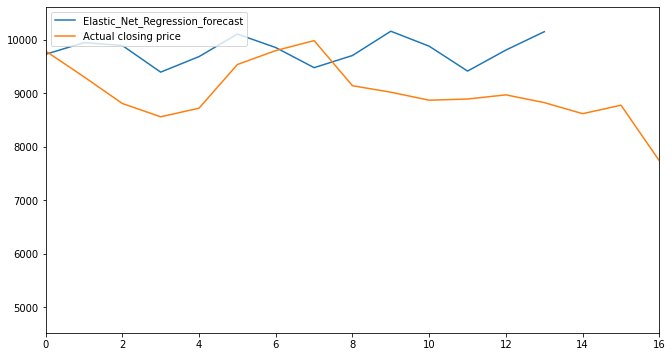

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11,6)
plt.plot(x_forecast2,label='Elastic_Net_Regression_forecast')
plt.plot(y_test,label='Actual closing price')
plt.legend(loc='upper left')
plt.xlim(0,16)
plt.show()

In [ ]:
print('R2-SCORE')
print(r2_score(x_forecast2,y_test[0:14]))

R2-SCORE
-10.05722433855447


In [ ]:
x_final_pred = []
x_temp2 = []
x1 = x_temp[-1]
x_final_pred = x1
x_final_pred = list(x_final_pred)
DAY = 30
def forecast(days=30):
  day=1
  while (day < days):
    x_temp2 = x_final_pred[-30:]
    x_temp2 = np.array(x_temp2)
    x_temp2 = x_temp2[::-1]
    x_temp2 = x_temp2.reshape(1,-1)
    pred = model_elastic.predict(x_temp2)
    x_final_pred.append(pred[0])
    day = day+1
  return x_final_pred
x_forecast = forecast(days=20)

In [ ]:
x1_true = list(regressor_df['close'])
x1_forecast = list(x1_true.copy())

In [ ]:
for i in range(30,len(x_forecast)):
  x1_forecast.append(x_forecast[i])

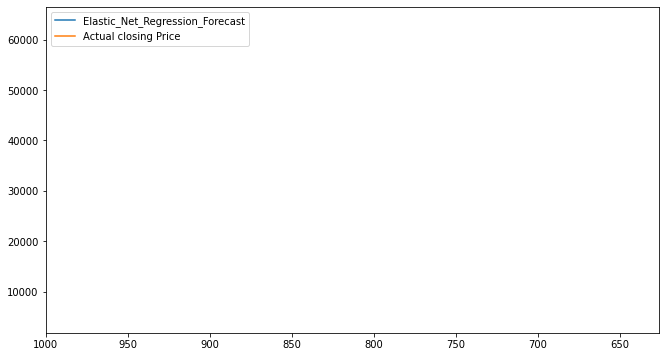

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11,6)
plt.plot(x1_forecast,label='Elastic_Net_Regression_Forecast')
plt.plot(x1_true,label='Actual closing Price')
plt.legend(loc='upper left')
plt.xlim(1000,len(x1_forecast))
plt.show()

Trying ARIMA Model

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(closedf2['close'])

1. ADF :  -0.7246367886688608
2. P-Value :  0.840264438782869
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 726
5. Critical Values :
	 1% :  -3.4393893552577723
	 5% :  -2.8655292671104644
	 10% :  -2.5688943376666744


Since Value of 'P-Value' is very high, the data is not stationary, and thus, ARIMA models will not be of much significance.

In [ ]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stepwise_fit = auto_arima(closedf2['close'],supperess_warnings=True)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  727
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6297.270
Date:                Thu, 09 Jun 2022   AIC                          12596.540
Time:                        09:39:05   BIC                          12601.128
Sample:                             0   HQIC                         12598.311
                                - 727                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          2e+06    5.9e+04     33.918      0.000    1.88e+06    2.12e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):               576.50
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Warnings: [1]covariance matrix calculated using the outer product of gradients(complex-step)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(df.shape)
train = closedf2.iloc[:-100]
test=closedf2.iloc[-100:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(727, 5)
(627, 2) (100, 2)
datetime    2020-05-14
close          9791.98
Name: 627, dtype: object datetime    2020-02-05
close          9612.04
Name: 726, dtype: object


In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# model_arima = ARIMA(train['close'],order=(5,2,0))
# model_arima=model_arima.fit()
# model_arima.summary()

In [ ]:
# start=len(train)
# end=len(train)+len(test)-1
# if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
# index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
# pred=model_arima.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
# pred.index=index_future_dates
# pred.plot(legend=True)
# test['close'].plot(legend=True)

In [ ]:
# Trying LSTM Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
values = closedf2['close'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
train_size = int(len(scaled) * 0.85)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

617 110


In [ ]:
def create_dataset(dataset, look_back=1):
    datax, datay = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        datax.append(a)
        datay.append(dataset[i + look_back, 0])
    print(len(datay))
    return np.array(datax), np.array(datay)

In [ ]:
look_back = 1
trainx, trainy = create_dataset(train, look_back)
testx, testy = create_dataset(test, look_back)

616
109



Reshaping X for training

In [ ]:
trainx = np.reshape(trainx,(trainx.shape[0],1,trainx.shape[1]))
testx = np.reshape(testx,(testx.shape[0],1,testx.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainx.shape[1], trainx.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainx, trainy, epochs=300, batch_size=100, validation_data=(testx, testy), verbose=1, shuffle=False)

Epoch 1/300
7/7 [==============================] - 7s 203ms/step - loss: 0.4804 - val_loss: 0.0280
Epoch 2/300
7/7 [==============================] - 0s 20ms/step - loss: 0.4363 - val_loss: 0.0203
Epoch 3/300
7/7 [==============================] - 0s 21ms/step - loss: 0.3949 - val_loss: 0.0373
Epoch 4/300
7/7 [==============================] - 0s 22ms/step - loss: 0.3628 - val_loss: 0.0610
Epoch 5/300
7/7 [==============================] - 0s 23ms/step - loss: 0.3394 - val_loss: 0.0793
Epoch 6/300
7/7 [==============================] - 0s 27ms/step - loss: 0.3195 - val_loss: 0.0951
Epoch 7/300
7/7 [==============================] - 0s 23ms/step - loss: 0.3010 - val_loss: 0.1095
Epoch 8/300
7/7 [==============================] - 0s 16ms/step - loss: 0.2833 - val_loss: 0.1233
Epoch 9/300
7/7 [==============================] - 0s 16ms/step - loss: 0.2659 - val_loss: 0.1367
Epoch 10/300
7/7 [==============================] - 0s 18ms/step - loss: 0.2493 - val_loss: 0.1492
Epoch 11/300
7/7 [

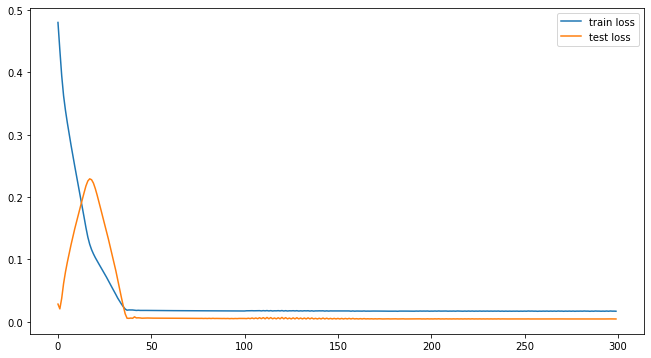

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

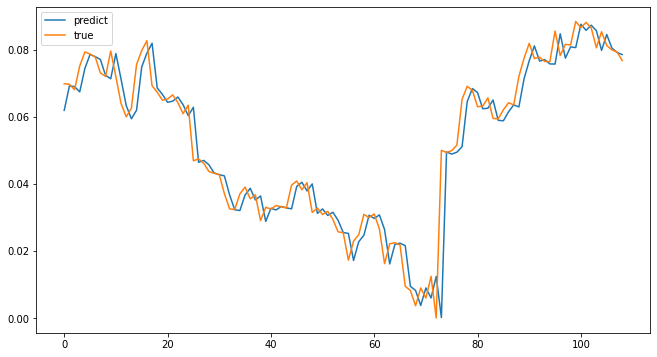

In [ ]:
yhat = model.predict(testx)
plt.plot(yhat, label='predict')
plt.plot(testy, label='true')
plt.legend()
plt.show()

In [ ]:
print('R2_Score: ')
print(r2_score(yhat, testy))
print('MSE:')
print(mean_squared_error(yhat, testy))

R2_Score: 
0.9104821342266106
MSE:
4.8540656e-05


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Comparing the Models used
x = PrettyTable()
x.field_names = ["Model Name", "R2_Score", "Mean_squared_error"]

x.add_row(['RandomForestRegressor(Using only past 3 days as the features)','-100.49', '1.5e6'])
x.add_row(['Linear Regression(Using only past 3 days as the features)','0.458', '0.4e6'])
x.add_row(['Linear_Regression(Using past 30 days as the features)','0.99659857', '765.198'])


print(x)

+---------------------------------------------------------------+------------+--------------------+
|                           Model Name                          |  R2_Score  | Mean_squared_error |
+---------------------------------------------------------------+------------+--------------------+
| RandomForestRegressor(Using only past 3 days as the features) |  -100.49   |       1.5e6        |
|   Linear Regression(Using only past 3 days as the features)   |   0.458    |       0.4e6        |
|     Linear_Regression(Using past 30 days as the features)     | 0.99659857 |      765.198       |
+---------------------------------------------------------------+------------+--------------------+


In [ ]:
x2 = PrettyTable()
x2.field_names = ["Model Name", "R2_Score", "Mean_squared_error"]
x2.add_row(['Linear Regressor','0.996598', '765.198'])
x2.add_row(['XGB Regressor','0.996215', '780.863'])
x2.add_row(['LightGBM Regressor','0.996467', '773.898'])
x2.add_row(['Ridge regression','0.996592', '765.378'])
x2.add_row(['Lasso Regressor','0.999224', '174.066'])
x2.add_row(['Elastic-Net Regressor','0.999193', '180.960'])
x2.add_row(['MultiLayerPerceptron regressor','0.9879', '807.992'])
x2.add_row(['SVR','0.876588', '5057.598'])
x2.add_row(['LSTM(RNN)','0.986834','1754.833'])

print(x2)

+--------------------------------+----------+--------------------+
|           Model Name           | R2_Score | Mean_squared_error |
+--------------------------------+----------+--------------------+
|        Linear Regressor        | 0.996598 |      765.198       |
|         XGB Regressor          | 0.996215 |      780.863       |
|       LightGBM Regressor       | 0.996467 |      773.898       |
|        Ridge regression        | 0.996592 |      765.378       |
|        Lasso Regressor         | 0.999224 |      174.066       |
|     Elastic-Net Regressor      | 0.999193 |      180.960       |
| MultiLayerPerceptron regressor |  0.9879  |      807.992       |
|              SVR               | 0.876588 |      5057.598      |
|           LSTM(RNN)            | 0.986834 |      1754.833      |
+--------------------------------+----------+--------------------+


In [ ]:
models = pd.DataFrame({
    'Model': [ 'Linear Regressor', 'XGB Regressor','LightGBM Regressor','Ridge regression','Lasso Regressor ','Elastic-Net Regressor','MultiLayerPerceptron regressor','SVR', 'LSTM(RNN) '],
    'R2_Score': [0.996598, 0.996215, 0.996467,0.996592,0.999224,0.999193,0.9879,0.876588 ,0.986834]})
models.sort_values(by='R2_Score', ascending=False)

,Model,R2_Score
4,Lasso Regressor,0.999224
5,Elastic-Net Regressor,0.999193
0,Linear Regressor,0.996598
3,Ridge regression,0.996592
2,LightGBM Regressor,0.996467
1,XGB Regressor,0.996215
6,MultiLayerPerceptron regressor,0.987900
8,LSTM(RNN),0.986834
7,SVR,0.876588


In [ ]:
# end to end Pipeline

In [ ]:
def forecast(days=30):
  day=1
  while(day<days):
    x_temp2 = x_final_pred[-30:]
    #print(X_temp2)
    x_temp2 = np.array(x_temp2)
    x_temp2 = x_temp2[::-1]
    x_temp2 = x_temp2.reshape(1,-1)
    pred = lasso_best.predict(x_temp2)
    x_final_pred.append(pred[0])
    day = day+1
  return x_final_pred

In [ ]:
def Get_Prediction(forecasting_days=15):
  x_final_pred = []
  x_temp2=[]
  x1 = x_temp[-1]
  x_final_pred = x1
  x_final_pred = list(x_final_pred)
  x_forecast = forecast(days=forecasting_days)
  plt.rcParams["figure.figsize"] = (11,6)
  plt.plot(x_forecast,label='Lasso_Regression_forecast')
  plt.plot(x1,label='Actual Closing Price')
  plt.legend(loc="upper right")
  plt.show()
  print('The Forecasted Values are as follows(days ahead of 2017-07-31):')
  print(x_forecast[-forecasting_days:])

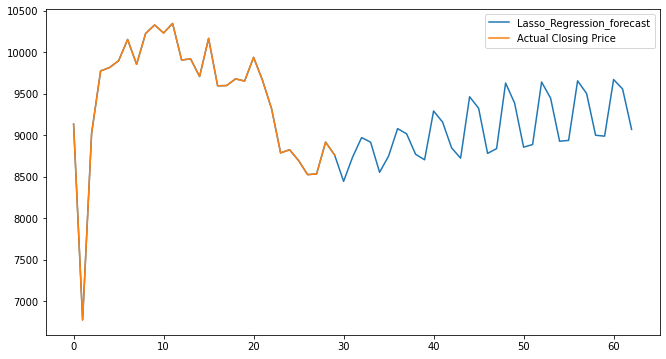

The Forecasted Values are as follows(days ahead of 2017-07-31):
[9626.749861111606, 9385.408443032286, 8854.418648059751, 8885.700516089773, 9639.084286443338, 9444.824965267882, 8925.889730977093, 8935.898501549493, 9653.088873555924, 9500.641077978953, 8997.922773954657, 8986.786305086442, 9669.467727917336, 9554.729910642125, 9068.691705760837]


In [ ]:
Get_Prediction()